머신러닝 : 기계학습. 예측. AI
     변수(컬럼,피처)들의 관계를 통해서 예측.
  지도학습 : 정답을 제공
     회귀분석 : 가격,주가,매출예측 사용됨. 연속성이 있는 데이터의 예측에 사용
     분류 : 데이터를 선택. 
  비지도학습 : 정답 제공안함
     군집 : 비슷한 데이터들 끼리 그룹화함
  강화학습 : 행동을 할때마다, 보상을 통해 학습  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

머신러닝 프로세스
1. 데이터정리 : 전처리
2. 데이터분리 : 훈련데이터,검증데이터,테스트데이터
3. 알고리즘 준비 : 회귀분석, 분류,.....
4. 모형학습 : 훈련데이터
5. 예측 : 테스트데이터
6. 모형평가
7. 모형활용

회귀분석 : regression
  단순회귀분석 : 독립변수,종속변수 한개
     독립변수 : 예측에 사용되는 변수
     종속변수 : 정답. 예측해야 되는 변수

In [2]:
df = pd.read_csv("data/auto-mpg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
#1. 전처리하기
# horsepower 컬럼의 자료형을 float 형으로 변경하기
# horsepower의 값을 조회하기
df.horsepower.unique()

In [ ]:
# ? 값을 결측값으로 변경하기 : np.nan :결측값 
df["horsepower"].replace('?',np.nan,inplace=True)
df.info()

In [ ]:
#결측값을 가진 행을 제거하기
df.dropna(subset=["horsepower"],axis=0,inplace=True)
df.info()

In [ ]:
#horsepower 자료형 float형으로 변경
df["horsepower"] = df["horsepower"].astype(float)
df.info()

In [8]:
#회귀분석에 필요한 변수(열,컬럼,속성,피처) 선택
ndf = df[["mpg","cylinders","horsepower","weight"]]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


In [9]:
ndf.corr()

,mpg,cylinders,horsepower,weight
mpg,1.000000,-0.777618,-0.778427,-0.832244
cylinders,-0.777618,1.000000,0.842983,0.897527
horsepower,-0.778427,0.842983,1.000000,0.864538
weight,-0.832244,0.897527,0.864538,1.000000


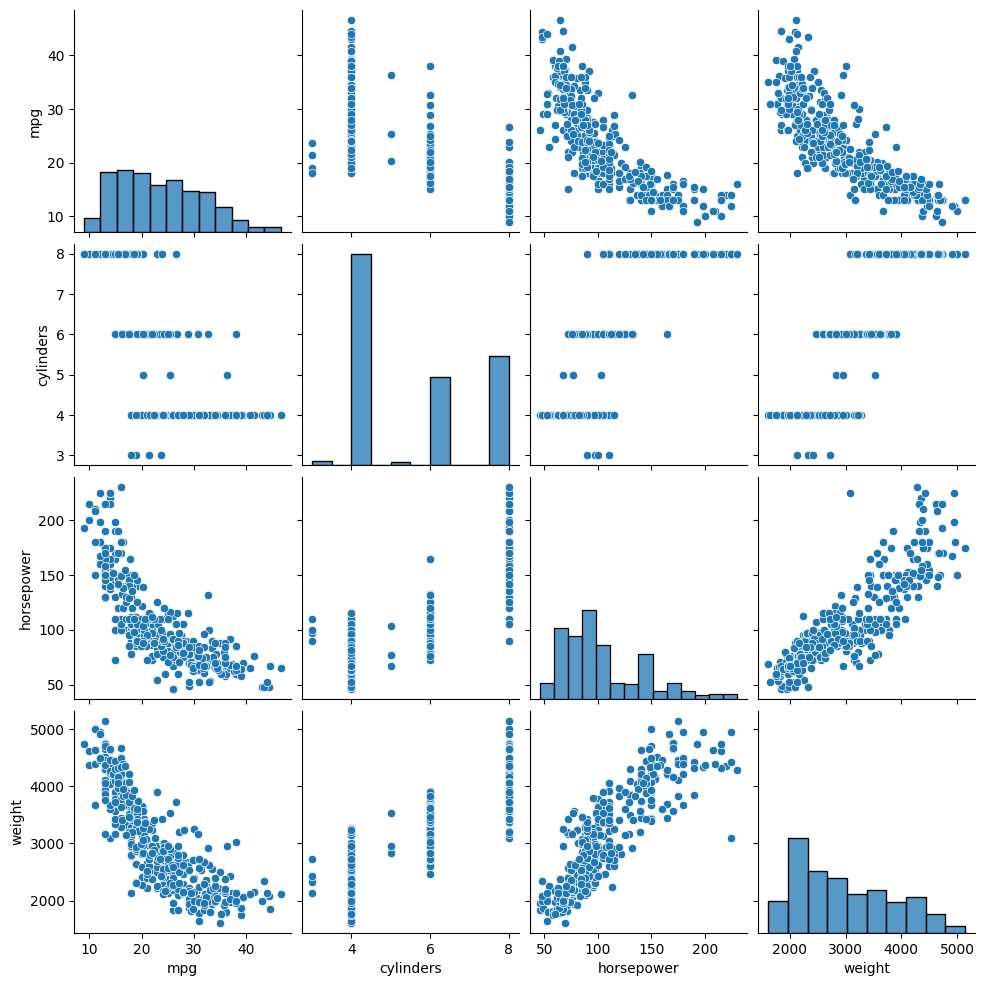

In [10]:
sns.pairplot(ndf)

In [11]:
#독립변수,종속변수
X=ndf[["weight"]]
Y=ndf["mpg"]
len(X)

392

In [14]:
#데이터분리 : 훈련데이터,테스트데이터로 분리
# pip install scikit-learn
from sklearn.model_selection import train_test_split
#train_test_split(독립변수,종속변수,테스트데이터의 비율,seed값)
# test_size=0.3 : 30%를 테스트데이터 분리. 기본:2.5
X_train,X_test,Y_train,Y_test = \
    train_test_split(X,Y,test_size=0.3,random_state=10)

X_train : 훈련데이터. 독립변수. 392 * 0.7 = 274.xxx  274개
X_test  : 테스트데이터. 독립변수 392 * 0.3 = 117.6   118개 
Y_train : 훈련데이터. 종속변수
Y_test  : 테스트데이터. 종속변수

In [15]:
print("X_train의 갯수:",len(X_train)) #274
print("X_test의 갯수:",len(X_test))   #118
print("Y_train의 갯수:",len(Y_train)) #274
print("Y_test의 갯수:",len(Y_test))   #118

X_train의 갯수: 274
X_test의 갯수: 118
Y_train의 갯수: 274
Y_test의 갯수: 118


In [16]:
#알고리즘 선택 : 선형회귀분석 : LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
#모형학습
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
#예측
y_hat = lr.predict(X_test) 
# y_hat : 예측된 연비
# Y_test : 실제 연비

In [20]:
#평가
print("예측된 연비 10개 :",y_hat[:10])
print("실제 연비 10개 :",Y_test[:10].tolist())

예측된 연비 10개 : [25.62103211 27.13295129 20.19362994 33.06432652 15.07636504 19.99979415
 16.70458569  6.85772747 28.6061033  29.04804891]
실제 연비 10개 : [21.5, 29.0, 23.9, 35.1, 17.5, 17.7, 13.0, 13.0, 43.4, 24.0]


In [21]:
r_square = lr.score(X_test,Y_test)
r_square

0.6822458558299325

In [22]:
r_square = lr.score(X,Y)
r_square

0.6919759765239986

결정계수 : 1 - 잔차제곱합/총변환량
  잔차제곱합 : ((Y-y_hat) ** 2).sum()
  총변환량 : ((Y-Y.mean()) ** 2).sum()

단일회귀분석 : 독립변수가 한개. 종속변수는 한개
     Y = aX + b => mpg = a(weight) + b
다중회귀분석 : 독립변수가 여러개. 종속변수는 한개
     Y = a1X1+a2X2... + b

In [ ]:
X=ndf[["weight","horsepower"]]

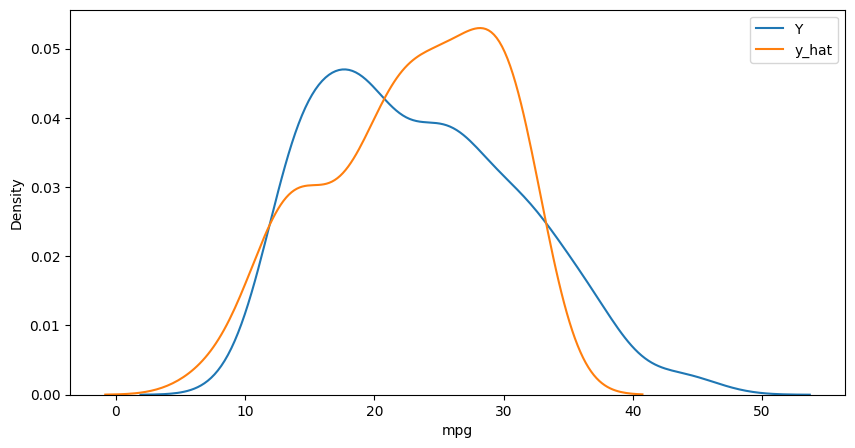

In [23]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(Y,label="Y")
ax2 = sns.kdeplot(y_hat,label="y_hat",ax=ax1)
plt.legend()

https://data.kma.go.kr/
기후통계분석
기온분석 데이터 다운받기
seoul20240711.csv 이름변경하기. header 정보 제거

In [26]:
#seoul20240711.csv 읽어서 seoul 저장하기
seoul = pd.read_csv("data/seoul20240711.csv",encoding="cp949")
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42223 entries, 0 to 42222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42223 non-null  object 
 1   지점       42223 non-null  int64  
 2   평균기온(℃)  41467 non-null  float64
 3   최저기온(℃)  41464 non-null  float64
 4   최고기온(℃)  41464 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [27]:
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [28]:
#날짜 컬럼의 \t 제거하기
seoul["날짜"] = seoul["날짜"].str.replace("\t","")
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [29]:
#년도컬럼, 월일 컬럼 추가하기
seoul["년도"] = seoul["날짜"].str[:4]
seoul["월일"] = seoul["날짜"].str[5:]
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,월일
0,1907-10-01,108,13.5,7.9,20.7,1907,10-01
1,1907-10-02,108,16.2,7.9,22.0,1907,10-02
2,1907-10-03,108,16.2,13.1,21.3,1907,10-03
3,1907-10-04,108,16.5,11.2,22.0,1907,10-04
4,1907-10-05,108,17.6,10.9,25.4,1907,10-05


In [30]:
# 지점컬럼을 제거하기
del seoul["지점"]

In [ ]:
seoul.info()

In [32]:
seoul.columns

Index(['날짜', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '년도', '월일'], dtype='object')

In [34]:
#컬럼명 : 날짜,평균기온,최저기온,최고기온,년도,월일 변경하기
#seoul.columns = ["날짜","평균기온","최저기온",...]
seoul.columns = list("날짜,평균기온,최저기온,최고기온,년도,월일".split(","))

In [35]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42223 entries, 0 to 42222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42223 non-null  object 
 1   평균기온    41467 non-null  float64
 2   최저기온    41464 non-null  float64
 3   최고기온    41464 non-null  float64
 4   년도      42223 non-null  object 
 5   월일      42223 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.9+ MB


In [39]:
#최저기온이 결측값인 정보 조회하기
seoul[seoul["최고기온"].isnull()]

,날짜,평균기온,최저기온,최고기온,년도,월일
15676,1950-09-01,NaN,NaN,NaN,1950,09-01
15677,1950-09-02,NaN,NaN,NaN,1950,09-02
15678,1950-09-03,NaN,NaN,NaN,1950,09-03
15679,1950-09-04,NaN,NaN,NaN,1950,09-04
15680,1950-09-05,NaN,NaN,NaN,1950,09-05
...,...,...,...,...,...,...
16430,1953-11-29,NaN,NaN,NaN,1953,11-29
16431,1953-11-30,NaN,NaN,NaN,1953,11-30
21260,1967-02-19,-1.7,NaN,NaN,1967,02-19
23691,1973-10-16,12.3,NaN,NaN,1973,10-16


In [43]:
#7월 11일에 정보만 seoul0711데이터로 저장하기

seoul0711 = seoul[seoul["월일"]=='07-11']
seoul0711.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 284 to 42222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      116 non-null    object 
 1   평균기온    114 non-null    float64
 2   최저기온    114 non-null    float64
 3   최고기온    114 non-null    float64
 4   년도      116 non-null    object 
 5   월일      116 non-null    object 
dtypes: float64(3), object(3)
memory usage: 6.3+ KB


In [ ]:
#seoul0711  데이터에서 결측값을 조회하기
seoul0711[seoul0711["최고기온"].isnull()]

In [45]:
#seoul0711 데이터에서 결측값 레코드 제거
seoul0711.dropna(subset=["최저기온"],axis=0,inplace=True)
seoul0711.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 284 to 42222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      114 non-null    object 
 1   평균기온    114 non-null    float64
 2   최저기온    114 non-null    float64
 3   최고기온    114 non-null    float64
 4   년도      114 non-null    object 
 5   월일      114 non-null    object 
dtypes: float64(3), object(3)
memory usage: 6.2+ KB


C:\Users\123rl\AppData\Local\Temp\ipykernel_12668\1943655695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul0711.dropna(subset=["최저기온"],axis=0,inplace=True)


In [ ]:
#seoul0711 년도 컬럼을 인덱스 컬럼으로 변경하기
seoul0711 = seoul0711.set_index("년도")
seoul0711.head()


<Axes: xlabel='년도'>

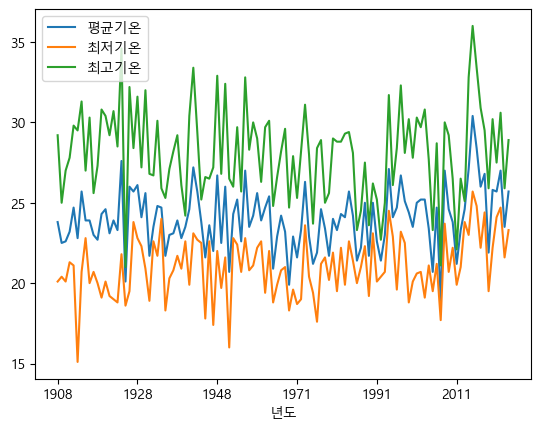

In [52]:
plt.rc("font",family="Malgun Gothic")
seoul0711[["평균기온","최저기온","최고기온"]].plot()

In [54]:
#다중회귀분석
seoul0711 = seoul0711.reset_index() #인덱스 => 컬럼으로
seoul0711.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      114 non-null    object 
 1   날짜      114 non-null    object 
 2   평균기온    114 non-null    float64
 3   최저기온    114 non-null    float64
 4   최고기온    114 non-null    float64
 5   월일      114 non-null    object 
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


In [80]:
#년도
seoul0711["년도"] = seoul0711["년도"].astype(str)
seoul0711.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      114 non-null    object 
 1   날짜      114 non-null    object 
 2   평균기온    114 non-null    float64
 3   최저기온    114 non-null    float64
 4   최고기온    114 non-null    float64
 5   월일      114 non-null    object 
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


In [89]:
#X=seoul0711[["년도","평균기온","최고기온"]]
X=seoul0711[["년도"]]
Y=seoul0711["최고기온"]
#알고리즘
model = LinearRegression()
#학습하기
model.fit(X,Y)
#예측하기
result = model.predict([[2024]])
result


c:\Users\123rl\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.82782908])

In [ ]:
#지도학습 : 기계 학습시 정답 제시
# 분류 : KNN(k-nearset-neighbors). 최근접이웃알고리즘

In [90]:
#titanic 데이터 로드
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [91]:
#deck 컬럼 제거
del df["deck"]

In [92]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
#embarked의 결측값을 최빈값으로 치환하기
most_freq = df["embarked"].value_counts().idxmax()
df["embarked"] = df["embarked"].fillna(most_freq)
df.info()

In [ ]:
df[["class","pclass"]] #설명변수로 pclass 선택

In [ ]:
df[["embarked","embark_town"]] #설명변수로 embarked 선택

In [ ]:
#설명변수,예측변수 설정
ndf = df[["survived","pclass","sex","age","sibsp","parch","embarked"]]
ndf.info()

In [ ]:
#age 컬럼이 결측값인 경우 레코드 제거하기
ndf = ndf.dropna(subset=["age"],axis=0)
ndf.info()

In [112]:
#원핫인코딩 : 문자열형 범주데이터를 모형이 인식할 수 있도록 숫자형 변경
onehot_sex = pd.get_dummies(ndf["sex"],dtype=int)
onehot_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [113]:
onehot_embarked = pd.get_dummies(ndf["embarked"],dtype="int")
onehot_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [114]:
#ndf 데이터에 onehot_sex,onehot_embarked 를 컬럼으로 추가하기
ndf = pd.concat([ndf,onehot_sex],axis=1) #컬럼으로 추가하기
ndf = pd.concat([ndf,onehot_embarked],axis=1) #컬럼으로 추가하기
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
 7   female    714 non-null    int64  
 8   male      714 non-null    int64  
 9   C         714 non-null    int64  
 10  Q         714 non-null    int64  
 11  S         714 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 72.5+ KB


In [115]:
#sex,embarked 컬럼을 제거하기
del ndf["sex"],ndf["embarked"]

In [116]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     714 non-null    int64  
 4   parch     714 non-null    int64  
 5   female    714 non-null    int64  
 6   male      714 non-null    int64  
 7   C         714 non-null    int64  
 8   Q         714 non-null    int64  
 9   S         714 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 61.4 KB


In [123]:
#설명변수(X),목표변수(Y) 결정
# "survived" 컬럼을 제외한 모든 컬럼
X = ndf[ndf.columns.difference(["survived"])]
Y = ndf["survived"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       714 non-null    int64  
 1   Q       714 non-null    int64  
 2   S       714 non-null    int64  
 3   age     714 non-null    float64
 4   female  714 non-null    int64  
 5   male    714 non-null    int64  
 6   parch   714 non-null    int64  
 7   pclass  714 non-null    int64  
 8   sibsp   714 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 55.8 KB


In [124]:
X.head()

,C,Q,S,age,female,male,parch,pclass,sibsp
0,0,0,1,22.0,0,1,0,3,1
1,1,0,0,38.0,1,0,0,1,1
2,0,0,1,26.0,1,0,0,3,0
3,0,0,1,35.0,1,0,0,1,1
4,0,0,1,35.0,0,1,0,3,0


In [ ]:
#설명변수의 정규화 필요함
# - 분석시 사용되는 변수값의 크기가 영향을 미침
# - 정규화 과정을 통해 설명변수의 값을 기준 단위로 변경 필요

In [125]:
from sklearn import preprocessing
import numpy as np
X = preprocessing.StandardScaler().fit(X).transform(X)
X[5]
X.shape
X

array([[-0.47180795, -0.20203051,  0.53307848, ..., -0.50589515,
         0.91123237,  0.52457013],
       [ 2.11950647, -0.20203051, -1.87589641, ..., -0.50589515,
        -1.47636364,  0.52457013],
       [-0.47180795, -0.20203051,  0.53307848, ..., -0.50589515,
         0.91123237, -0.55170307],
       ...,
       [-0.47180795, -0.20203051,  0.53307848, ..., -0.50589515,
        -1.47636364, -0.55170307],
       [ 2.11950647, -0.20203051, -1.87589641, ..., -0.50589515,
        -1.47636364, -0.55170307],
       [-0.47180795,  4.94974747, -1.87589641, ..., -0.50589515,
         0.91123237, -0.55170307]])

In [126]:
#훈련데이터,테스트 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = \
    train_test_split(X,Y,test_size=0.3,random_state=10)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors=5 : 가장가까운 값을 5개 선택
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train) #학습하기
y_hat = knn.predict(x_test) #예측하기

In [138]:
#y_hat : 예측된값
#y_test : 실제데이터
print(y_hat[:20])
print(y_test.values[:20])

[0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1]
[0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1]


In [136]:
from sklearn import metrics
knn_report =  metrics.classification_report(y_test,y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       125
           1       0.81      0.71      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



support : 전체건수 (x_test)의 건수
precision(정밀도) : 실제 생존한 인원 /실제 생존자로 예측한 인원
recall  (재현율,민감도) : 생존자로 예측한 인원/실제 생존한 인원 
accuracy (정확도) : 정확한 예측/전체데이터  
f1-score(조화평균) : 정밀도와 재현율 값을 이용한 성능평가지수
       2*(정밀도*재현율)/(정밀도+재현율)
macro avg : 평균의평균  
weighted avg : 가중치 평균   

실제생존자정보 : 0 0 0 0 1 1 1 1 1 1
예측생존자정보 : 0 0 0 0 1 1 1 1 1 0
정확도 : 9 / 10 = 0.9
정밀도 : 5 / 5  = 1.0
재현율 : 5 / 6  = 0.8333


In [139]:
#혼동행렬 : 분류된 결과
knn_matrix = metrics.confusion_matrix(y_test,y_hat)
knn_matrix

array([[110,  15],
       [ 26,  64]])

     예측  0    1
  실제 0 [110, 15]
  실제 1 [ 26, 64]

  TN : 110 : 실제(0),예측(0)
  FP : 15  : 실제(0),예측(1)
  FN : 26  : 실제(1),예측(0)
  TP : 64  : 실제(1),예측(1)

  실제와 같이 예측 : TN,TP
  실제와 다른 예측 : FN,FP

  정확도 : (TN+TP)/(TN+TP+FN+FP) = (110+64)/(110+15+26+64) = 
          174/215=0.8093023255813953
  정밀도 : 실제 생존인원/생존자로 예측        
          TP / TP + FP = 64/(64+15) = 0.810126582278481
  재현율 : 생존자로 예측 / 실제 생존인원       
          TP / TP + FN = 64/(64+26) = 0.7111111111111111

In [ ]:
from sklearn.metrics import accuracy_score,\
     precision_score, recall_score, f1_score
print("정확도(accuracy): %.3f" % accuracy_score(y_test, y_hat)) #0.809
print("정밀도(Precision) : %.3f" % precision_score(y_test, y_hat)) #0.810
print("재현율(Recall) : %.3f" %  recall_score(y_test, y_hat)) #0.711
print("F1-score : %.3f" %  f1_score(y_test, y_hat)) #0.757

In [ ]:
# 비지도학습 : 목표변수
# 군집 : 데이터를 그룹화(클러스트)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris

In [ ]:
datas = pd.DataFrame(iris.data)
datas.info()

In [ ]:
datas.columns = ["slength","swidth","plength","pwidth"]
datas.info()

In [ ]:
labels = pd.DataFrame(iris.target)
labels.columns=["labels"]
labels.info()

In [ ]:
data = pd.concat([datas,labels],axis=1)
data.info()

In [155]:
from sklearn import cluster
feather = data[["slength","swidth"]] #목표변수
#n_clusters=3 : cluster 갯수
model = cluster.KMeans(n_clusters=3)
model.fit(feather) #학습
data["group"] = model.labels_
#data.info()
data["group"].unique()

array([1, 2, 0], dtype=int32)

<Axes: xlabel='slength', ylabel='swidth'>

<Figure size 640x480 with 0 Axes>

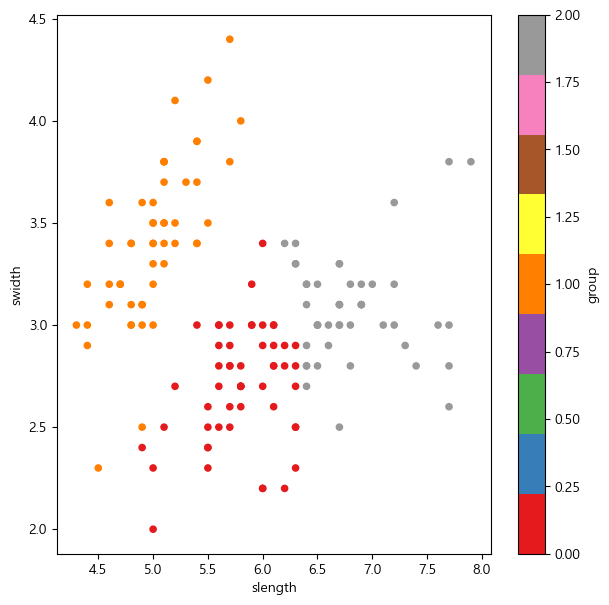

In [157]:
#예측데이터로 그래프 출력하기
fig = plt.figure()
data.plot(kind="scatter",x="slength",y="swidth",c="group",cmap="Set1",\
          colorbar=True,figsize=(7,7))

<Axes: xlabel='slength', ylabel='swidth'>

<Figure size 640x480 with 0 Axes>

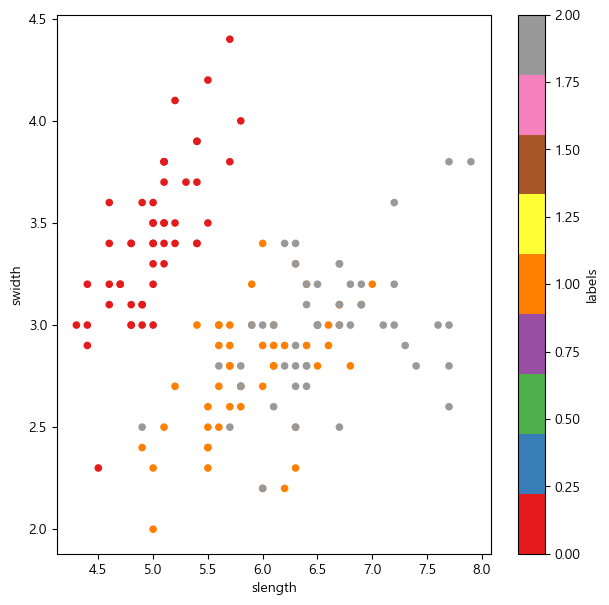

In [158]:
#실제데이터로 그래프 출력하기
fig = plt.figure()
data.plot(kind="scatter",x="slength",y="swidth",c="labels",cmap="Set1",\
          colorbar=True,figsize=(7,7))

인공신경망(ANN)
  단위 : 퍼셉트론

  y = x1w1 + x2w2 + b
     x1,x2 : 입력값
     y  : 결과값
     w  : 가중치
     b  : 편향

In [165]:
def AND(x1,x2) : 
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.9
    tmp = np.sum(w*x) + b  #(1,1) * (0.5,0.5) => sum(0.5,0.5) + -0.8
    if tmp <= 0 :
        return 0
    else :
        return 1    

In [166]:
for xs in [(0,0),(0,1),(1,0),(1,1)] :
    y = AND(xs[0],xs[1])
    print(xs,"=>",y)

(0, 0) => 0
(0, 1) => 0
(1, 0) => 0
(1, 1) => 1


In [163]:
import tensorflow as tf  #pip install tensorflow
print(tf.__version__)

2.17.0


In [164]:
tf.config.list_physical_devices("GPU") #[] GPU 환경 아님

[]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse
import numpy as np

In [28]:
data = np.array([[0,0],[0,1],[1,0],[1,1]]) #입력값
#label=np.array([[0],[0],[0],[1]])  #결과값
label=np.array([[0],[1],[1],[1]])  #결과값
label

array([[0],
       [1],
       [1],
       [1]])

In [29]:
model = Sequential() #딥러닝 모델
''' 
Dense : 밀집층
Dense(1,input_shape=(2,),activation='linear')
   1 : 출력값의 갯수
   input_shape=(2,) : 입력값의 갯수
   activation='linear' : 활성화 함수 
     linear : 선형함수
     
'''
model.add(Dense(1,input_shape=(2,),activation='linear'))
''' 
  compile : 모델 설정. 
    optimizer=SGD() : 경사하강법 알고리즘 설정
    loss=mse : 손실함수. mse : 평균제곱오차
               mse 값이 적은 경우 
    metrics=['acc'] : 평가 방법 지정. acc:정확도           
'''
model.compile(optimizer=SGD(),loss=mse,metrics=['acc'])
''' 
   학습하기
   data : 훈련데이터
   label : 정답
   epochs=300 : 반복횟수
   verbose=0 : 학습과정 출력 생략
   verbose=1 : 학습과정 상세출력 (기본값)
   verbose=2 : 학습과정 간단 출력  
'''
model.fit(data,label,epochs=300,verbose=2)


Epoch 1/300
1/1 - 0s - 309ms/step - acc: 0.7500 - loss: 0.2792
Epoch 2/300
1/1 - 0s - 71ms/step - acc: 0.7500 - loss: 0.2771
Epoch 3/300
1/1 - 0s - 28ms/step - acc: 0.7500 - loss: 0.2750
Epoch 4/300
1/1 - 0s - 31ms/step - acc: 0.7500 - loss: 0.2730
Epoch 5/300
1/1 - 0s - 28ms/step - acc: 0.7500 - loss: 0.2709
Epoch 6/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2689
Epoch 7/300
1/1 - 0s - 31ms/step - acc: 0.7500 - loss: 0.2669
Epoch 8/300
1/1 - 0s - 31ms/step - acc: 0.7500 - loss: 0.2649
Epoch 9/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2630
Epoch 10/300
1/1 - 0s - 34ms/step - acc: 0.7500 - loss: 0.2611
Epoch 11/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2592
Epoch 12/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2573
Epoch 13/300
1/1 - 0s - 30ms/step - acc: 0.7500 - loss: 0.2554
Epoch 14/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2536
Epoch 15/300
1/1 - 0s - 30ms/step - acc: 0.7500 - loss: 0.2517
Epoch 16/300
1/1 - 0s - 29ms/step - acc: 0.7500 - loss: 0.2499


In [30]:
print(model.get_weights())  #가중치 출력
print(model.predict(data))  #예측하기
print(model.evaluate(data,label)) #평가

[array([[0.4509821 ],
       [0.72422534]], dtype=float32), array([0.14609146], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.14609146]
 [0.8703168 ]
 [0.59707355]
 [1.3212988 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - acc: 1.0000 - loss: 0.0759
[0.07593577355146408, 1.0]


In [46]:
#MNIST 데이터를 이용하여 숫자를 학습하여 숫자 인식하기.
#MNIST 데이터셋 다운받기
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train),(x_test, y_test)=\
    load_data(path='mnist.npz')

In [32]:
x_train.shape

(60000, 28, 28)

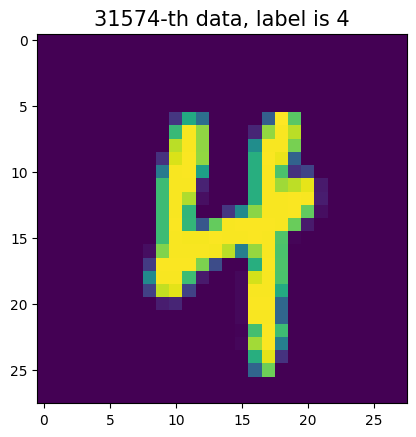

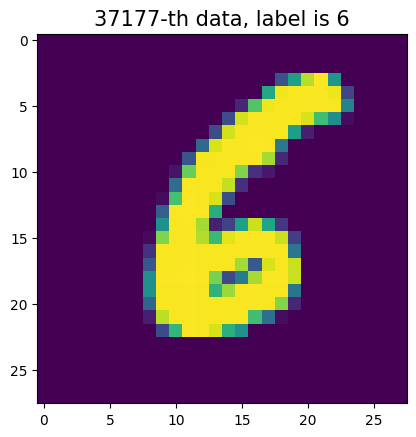

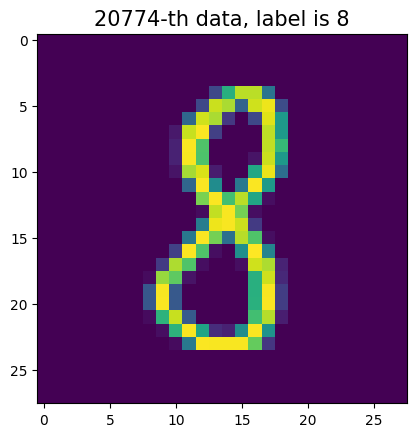

In [19]:
import matplotlib.pyplot as plt
import numpy as np
random_idx = np.random.randint(60000,size=3) 
for idx in random_idx :
    img = x_train[idx,:]
    label=y_train[idx] 
    plt.figure()
    plt.imshow(img)  #이미지 출력
    plt.title('%d-th data, label is %d' % (idx,label),fontsize=15)


In [47]:
from sklearn.model_selection import train_test_split
#x_val : 검증데이터
x_train,x_val,y_train,y_val = train_test_split\
    (x_train,y_train,test_size=0.3, random_state=777)  


In [36]:
x_train.shape
x_val.shape

(18000, 28, 28)

In [48]:
#데이터 정규화
#이미지 데이터 : 28 * 28
#              0 ~ 255사이의 값 => 0~1사이의값 정규화
x_train = (x_train.reshape(42000,28*28))/255 #이미지를 1차원. 값/255 => 1이하값
x_val = (x_val.reshape(18000,28*28))/255
x_test = (x_test.reshape(10000,28*28))/255


In [37]:
y_train[:10]

array([2, 7, 6, 6, 4, 0, 2, 8, 7, 7], dtype=uint8)

In [49]:
#원핫인코딩하기 => 다중분류 데이터
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


In [39]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()  #모델 생성
''' 
  Dense(64,activation="relu",input_shape=(784,))
     64 : 출력값
     activation="relu" : 활성화 함수
     input_shape=(784,) : 이미지 데이터. 28*28=784
'''
model.add(Dense(64,activation="relu",input_shape=(784,)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))


In [51]:
print(model.summary())


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['acc'])


In [53]:
#validation_data : 검증데이터 설정
#          학습시 검증데이터로 중간 평가. 
#          중간데이터의 결과 : val_loss, val_acc
history=model.fit(x_train,y_train,epochs=30,batch_size=127,
                  validation_data=(x_val,y_val)) 


Epoch 1/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7069 - loss: 0.9485 - val_acc: 0.9277 - val_loss: 0.2522
Epoch 2/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9320 - loss: 0.2339 - val_acc: 0.9459 - val_loss: 0.1889
Epoch 3/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9534 - loss: 0.1635 - val_acc: 0.9564 - val_loss: 0.1532
Epoch 4/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9627 - loss: 0.1285 - val_acc: 0.9599 - val_loss: 0.1428
Epoch 5/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9697 - loss: 0.1050 - val_acc: 0.9603 - val_loss: 0.1364
Epoch 6/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9719 - loss: 0.0922 - val_acc: 0.9652 - val_loss: 0.1189
Epoch 7/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9772 - loss: 0.0773 - val_acc: 0.9657 - val_loss: 0.1152
Epoch 8/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9818 - loss: 0.0641 - val_acc: 0.9662 - val_loss: 0.1115
Epoch 9/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [55]:
history.history #학습 과정의 데이터 저장

{'acc': [0.8479523658752441,
  0.9382143020629883,
  0.9554047584533691,
  0.9635952115058899,
  0.9698809385299683,
  0.9732381105422974,
  0.9770714044570923,
  0.9808333516120911,
  0.9825237989425659,
  0.9846904873847961,
  0.9864524006843567,
  0.9879999756813049,
  0.9893571138381958,
  0.9907380938529968,
  0.991357147693634,
  0.9933571219444275,
  0.9938333630561829,
  0.9941190481185913,
  0.994952380657196,
  0.9961190223693848,
  0.9963095188140869,
  0.9970476031303406,
  0.99657142162323,
  0.9966428279876709,
  0.9972618818283081,
  0.9983809590339661,
  0.9973095059394836,
  0.9981666803359985,
  0.9993095397949219,
  0.9988095164299011],
 'loss': [0.5196716785430908,
  0.21272091567516327,
  0.15508601069450378,
  0.12539082765579224,
  0.10381666570901871,
  0.09063511341810226,
  0.07796407490968704,
  0.06681406497955322,
  0.06002325192093849,
  0.05192416533827782,
  0.04711725562810898,
  0.04074695333838463,
  0.036186981946229935,
  0.032530777156353,
  0.0289

In [56]:
history.history["loss"]

[0.5196716785430908,
 0.21272091567516327,
 0.15508601069450378,
 0.12539082765579224,
 0.10381666570901871,
 0.09063511341810226,
 0.07796407490968704,
 0.06681406497955322,
 0.06002325192093849,
 0.05192416533827782,
 0.04711725562810898,
 0.04074695333838463,
 0.036186981946229935,
 0.032530777156353,
 0.028980225324630737,
 0.024483337998390198,
 0.022192275151610374,
 0.020694945007562637,
 0.017851024866104126,
 0.014819832518696785,
 0.015185749158263206,
 0.011577636934816837,
 0.012245051562786102,
 0.012000758200883865,
 0.010256967507302761,
 0.007922072894871235,
 0.008920500054955482,
 0.006817161105573177,
 0.004179632291197777,
 0.005165296606719494]

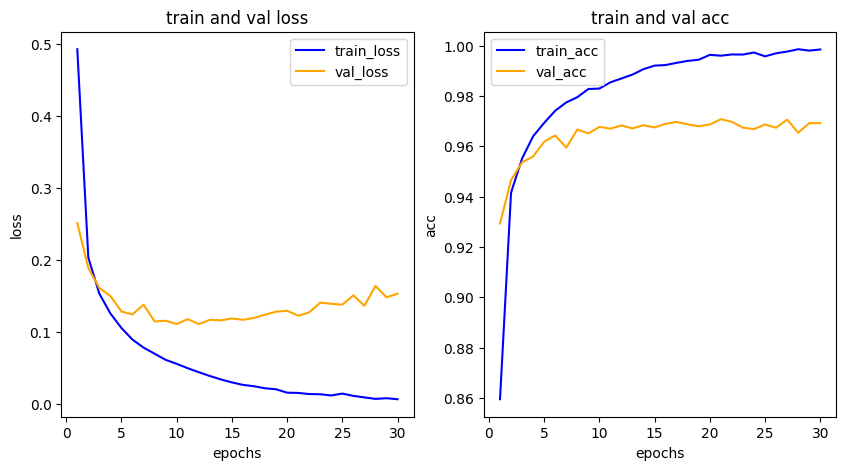

In [27]:
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss'] #학습데이터의 손실함수값
val_loss = his_dict['val_loss'] #검증데이터의 손실함수값
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1) #1행2열 1번째 그래프
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend() 

#정확도 그래프
acc = his_dict['acc']
val_acc = his_dict['val_acc']
ax2 = fig.add_subplot(1, 2, 2)  #1행2열 2번째 그래프
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend() 


In [58]:
#예측하기
results = model.predict(x_test)
results[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.7325130e-12, 5.6981492e-14, 5.6724684e-11, 1.3131623e-07,
       1.6500093e-17, 4.4700829e-13, 2.8049349e-21, 9.9999988e-01,
       1.3253130e-11, 1.1538522e-08], dtype=float32)

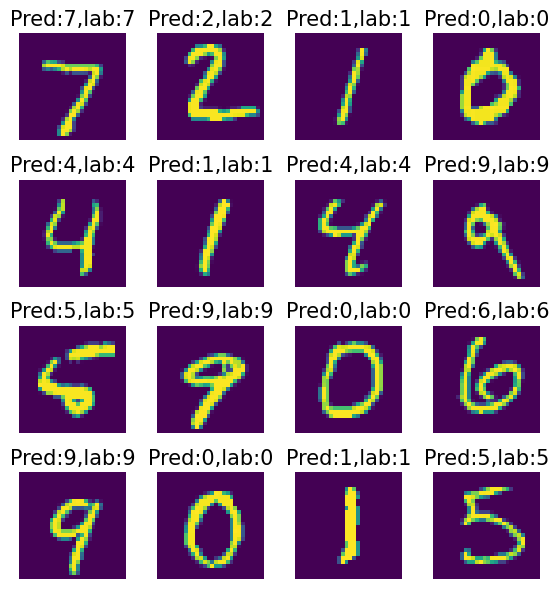

In [60]:
arg_results = np.argmax(results,axis=1)
plt.figure(figsize=(6,6))
for idx in range(16) :
    plt.subplot(4,4,idx+1)
    plt.axis("off")
    plt.imshow(x_test[idx].reshape(28,28))
    plt.title("Pred:%d,lab:%d" % \
              (arg_results[idx],np.argmax(y_test[idx],axis=-1)),fontsize=15)
    plt.tight_layout()